In [184]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from xgboost import XGBRegressor

In [22]:
path = '../Data'

csv_files = glob.glob(path + "/*.csv")

# Create an empty dictionary to store the DataFrames
dataframes = {}

for file in csv_files:
  # Get the base name of the file
  base_name = os.path.basename(file)
  
  # Remove the .csv extension to get the clean name
  # and add '_df' to match your requested format
  df_name = f"{os.path.splitext(base_name)[0]}_df"
  
  # Read the csv and add it to the dictionary
  dataframes[df_name] = pd.read_csv(file)

print("✅ DataFrames created successfully!")
print("Available DataFrames:", list(dataframes.keys()))

✅ DataFrames created successfully!
Available DataFrames: ['game_lineups_df', 'competitions_df', 'appearances_df', 'player_valuations_df', 'game_events_df', 'transfers_df', 'players_df', 'games_df', 'club_games_df', 'clubs_df']


In [23]:
# Unpack the dictionary into separate global variables
for name, df in dataframes.items():
  globals()[name] = df

print("✅ Variables created successfully.")

✅ Variables created successfully.


In [24]:
players_df.drop(columns = ['first_name', 'last_name','player_code', 'image_url', 'url'], inplace = True)
players_df.head()

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav Klose,2015,398,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman Weidenfeller,2017,16,Germany,Diez,Germany,1980-08-06 00:00:00,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar Berbatov,2015,1091,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30 00:00:00,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,Lúcio,2012,506,Brazil,Brasília,Brazil,1978-05-08 00:00:00,Centre-Back,Defender,NaN,NaN,NaN,NaN,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom Starke,2017,27,East Germany (GDR),Freital,Germany,1981-03-18 00:00:00,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,L1,FC Bayern München,100000.0,3000000.0


In [166]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   name                                  32601 non-null  object 
 2   last_season                           32601 non-null  int64  
 3   current_club_id                       32601 non-null  int64  
 4   country_of_birth                      29802 non-null  object 
 5   city_of_birth                         30146 non-null  object 
 6   country_of_citizenship                32218 non-null  object 
 7   date_of_birth                         32554 non-null  object 
 8   sub_position                          32421 non-null  object 
 9   position                              32601 non-null  object 
 10  foot                                  30065 non-null  object 
 11  height_in_cm   

In [5]:
game_lineups_df.head()

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0


In [25]:
competitions_df.drop(columns = ['competition_code','sub_type', 'url'], inplace=True)
competitions_df.head()

,competition_id,name,type,country_id,country_name,domestic_league_code,confederation,is_major_national_league
0,CIT,italy-cup,domestic_cup,75,Italy,IT1,europa,False
1,NLSC,johan-cruijff-schaal,other,122,Netherlands,NL1,europa,False
2,GRP,kypello-elladas,domestic_cup,56,Greece,GR1,europa,False
3,POSU,supertaca-candido-de-oliveira,other,136,Portugal,PO1,europa,False
4,RUSS,russian-super-cup,other,141,Russia,RU1,europa,False


In [7]:
appearances_df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [8]:
player_valuations_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [128]:
# --- 1. Prepare DataFrames ---
# Ensure date columns are in datetime format for correct sorting
player_valuations_df['date'] = pd.to_datetime(player_valuations_df['date'])
appearances_df['date'] = pd.to_datetime(appearances_df['date'])

# Select relevant columns from each DataFrame
stats_to_sum = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']
appearances_subset = appearances_df[['player_id', 'date'] + stats_to_sum]
valuations_subset = player_valuations_df[['player_id', 'date']]


# --- 2. Combine DataFrames ---
# Concatenate the two DataFrames into one long list of events
combined_df = pd.concat([appearances_subset, valuations_subset], ignore_index=True)


# --- 3. Sort Chronologically ---
# Sort all events by player and then by date
combined_df_sorted = combined_df.sort_values(by=['player_id', 'date'], ascending=True)


# --- 4. Calculate Cumulative Sums ---
# Group by player and calculate the running total for each stat
# shift(1) is used so the sum includes stats *before* the current date
cumulative_stats = combined_df_sorted.groupby('player_id')[stats_to_sum].cumsum().shift(1)


# --- 5. Merge Final Results ---
# Add the cumulative stats back to the sorted combined DataFrame
final_combined = pd.concat([combined_df_sorted, cumulative_stats.add_prefix('cumulative_')], axis=1)

# Merge the results back onto your original valuations DataFrame
# This selects only the rows that were originally valuation events
final_df = pd.merge(
    player_valuations_df, 
    final_combined, 
    on=['player_id', 'date'], 
    how='left'
)

final_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,yellow_cards,red_cards,goals,assists,minutes_played,cumulative_yellow_cards,cumulative_red_cards,cumulative_goals,cumulative_assists,cumulative_minutes_played
0,405973,2000-01-20,150000,3057,BE1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,342216,2001-07-20,100000,1241,SC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3132,2003-12-09,400000,126,TR1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,76.0
3,6893,2003-12-15,900000,984,GB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2004-10-04,7000000,398,IT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
final_df = final_df.dropna().sort_values(by='market_value_in_eur', ascending=False)
final_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,yellow_cards,red_cards,goals,assists,minutes_played,cumulative_yellow_cards,cumulative_red_cards,cumulative_goals,cumulative_assists,cumulative_minutes_played,date_of_birth,age,sub_position
0,418560,2024-10-01,200000000,281,GB1,0.0,0.0,1.0,0.0,60.0,17.0,0.0,193.0,38.0,16079.0,2000-07-21,24.20,Centre-Forward
1,342229,2018-10-24,180000000,418,ES1,0.0,0.0,0.0,0.0,90.0,9.0,1.0,50.0,27.0,5921.0,1998-12-20,19.84,Centre-Forward
2,342229,2022-11-02,160000000,418,ES1,0.0,0.0,1.0,1.0,90.0,34.0,1.0,186.0,89.0,19040.0,1998-12-20,23.87,Centre-Forward
3,148455,2019-12-10,150000000,31,GB1,0.0,0.0,1.0,0.0,90.0,12.0,0.0,131.0,63.0,20180.0,1992-06-15,27.49,Right Winger
4,200512,2019-12-10,150000000,27,L1,1.0,0.0,0.0,1.0,90.0,26.0,2.0,94.0,40.0,17038.0,1992-04-10,27.67,Left Winger


In [140]:
# --- Step 1: Prepare player data ---
# Select only the columns you need from the players DataFrame
player_birthdays = players_df[['player_id', 'date_of_birth']]

# --- Step 2: Merge to add date of birth to your main DataFrame ---
# This assumes 'final_df' already exists and has 'player_id' and 'date' columns
final_df = pd.merge(final_df, player_birthdays, on='player_id', how='left')

# --- Step 3: Convert columns to datetime objects ---
# This is crucial for performing calculations
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['date_of_birth'] = pd.to_datetime(final_df['date_of_birth'])

# --- Step 4: Calculate the age in years ---
# Subtract the dates and divide by 365.25 to get the age in years
final_df['age'] = (final_df['date'] - final_df['date_of_birth']).dt.days / 365.25

# You can round the age if you prefer
final_df['age'] = final_df['age'].round(2)

# Display the result with the new 'age' column
final_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,yellow_cards,red_cards,goals,assists,minutes_played,cumulative_yellow_cards,cumulative_red_cards,cumulative_goals,cumulative_assists,cumulative_minutes_played,date_of_birth,age
0,418560,2024-10-01,200000000,281,GB1,0.0,0.0,1.0,0.0,60.0,17.0,0.0,193.0,38.0,16079.0,2000-07-21,24.20
1,342229,2018-10-24,180000000,418,ES1,0.0,0.0,0.0,0.0,90.0,9.0,1.0,50.0,27.0,5921.0,1998-12-20,19.84
2,342229,2022-11-02,160000000,418,ES1,0.0,0.0,1.0,1.0,90.0,34.0,1.0,186.0,89.0,19040.0,1998-12-20,23.87
3,148455,2019-12-10,150000000,31,GB1,0.0,0.0,1.0,0.0,90.0,12.0,0.0,131.0,63.0,20180.0,1992-06-15,27.49
4,200512,2019-12-10,150000000,27,L1,1.0,0.0,0.0,1.0,90.0,26.0,2.0,94.0,40.0,17038.0,1992-04-10,27.67


In [167]:
sub_positions = players_df[['player_id', 'sub_position']]

# Perform a left merge to add the sub_position to final_df
final_df = pd.merge(final_df, sub_positions, on='player_id', how='left')

   player_id       date  market_value_in_eur  current_club_id  \
0     418560 2024-10-01            200000000              281   
1     342229 2018-10-24            180000000              418   
2     342229 2022-11-02            160000000              418   
3     148455 2019-12-10            150000000               31   
4     200512 2019-12-10            150000000               27   

  player_club_domestic_competition_id  yellow_cards  red_cards  goals  \
0                                 GB1           0.0        0.0    1.0   
1                                 ES1           0.0        0.0    0.0   
2                                 ES1           0.0        0.0    1.0   
3                                 GB1           0.0        0.0    1.0   
4                                  L1           1.0        0.0    0.0   

   assists  minutes_played  cumulative_yellow_cards  cumulative_red_cards  \
0      0.0            60.0                     17.0                   0.0   
1      0.0      

In [169]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   player_id                            5008 non-null   int64         
 1   date                                 5008 non-null   datetime64[ns]
 2   market_value_in_eur                  5008 non-null   int64         
 3   current_club_id                      5008 non-null   int64         
 4   player_club_domestic_competition_id  5008 non-null   object        
 5   yellow_cards                         5008 non-null   float64       
 6   red_cards                            5008 non-null   float64       
 7   goals                                5008 non-null   float64       
 8   assists                              5008 non-null   float64       
 9   minutes_played                       5008 non-null   float64       
 10  cumulative_y

In [118]:
# First, ensure the 'date' column is a datetime type
player_valuations_df['date'] = pd.to_datetime(player_valuations_df['date'])

# Sort by player_id and then by date (most recent first)
df_sorted = player_valuations_df.sort_values(by=['player_id', 'market_value_in_eur'], ascending=[True, False])

# Drop duplicates, keeping the first row for each player
max_vals = df_sorted.drop_duplicates(subset='player_id', keep='first')

max_vals = max_vals.sort_values(by='market_value_in_eur', ascending=False)

max_vals.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
486829,418560,2024-10-01,200000000,281,GB1
253167,342229,2018-12-17,200000000,418,ES1
487970,371998,2024-10-11,200000000,418,ES1
494499,937958,2024-12-27,180000000,131,ES1
472959,581678,2023-12-22,180000000,418,ES1


In [133]:
goals_comp.loc[418560]

player_name    Erling Haaland
Name: 418560, dtype: object

In [117]:
max_vals['player_id'].value_counts()

player_id
10         1
398324     1
398945     1
398886     1
398851     1
          ..
157818     1
157672     1
157668     1
157648     1
1310513    1
Name: count, Length: 31078, dtype: int64

In [9]:
game_events_df.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [10]:
transfers_df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia


In [11]:
games_df.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,Jens Keller,Thorsten Fink,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,Torsten Lieberknecht,Robin Dutt,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,Jürgen Klopp,Thorsten Fink,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


In [12]:
club_games_df.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468.0,0.0,NaN,Holger Bachthaler,24.0,2.0,NaN,Armin Veh,Home,0
1,2320454,222.0,0.0,NaN,Volkan Uluc,79.0,2.0,NaN,Bruno Labbadia,Home,0
2,2320460,1.0,3.0,NaN,Jürgen Luginger,86.0,1.0,NaN,Robin Dutt,Home,1
3,2320472,2036.0,4.0,NaN,Frank Schmidt,72.0,5.0,NaN,Alexander Schmidt,Home,0
4,2321027,33.0,3.0,8.0,Jens Keller,41.0,3.0,9.0,Thorsten Fink,Home,0


In [26]:
clubs_df.drop(columns = ['filename', 'url'], inplace=True)
clubs_df.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024


In [14]:
clubs_df.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season'],
      dtype='object')

In [41]:
goals_df = appearances_df.groupby('player_id', as_index=False)[['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']].sum().set_index('player_id')
goals_df.head()

,yellow_cards,red_cards,goals,assists,minutes_played
player_id,,,,,
10,19,0,48,25,8808
26,4,2,0,0,13508
65,11,1,38,13,8788
77,0,0,0,0,307
80,0,0,0,0,1080


In [42]:
goals_comp = appearances_df[['player_id', 'player_name']].set_index('player_id')
goals_comp.head()

,player_name
player_id,
38004,Aurélien Joachim
79232,Ruslan Abyshov
42792,Sander Puri
73333,Vegar Hedenstad
122011,Markus Henriksen


In [43]:
goals_comp = goals_comp.loc[~goals_comp.index.duplicated(keep='first')]

In [44]:
goals_df = goals_df.join(player_valuations_df['player_name'])

In [91]:
goals_df = goals_df.join(player_valuations_df[['current_club_id', 'player_club_domestic_competition_id']])

In [92]:
goals_df.sort_values('goals', ascending=False).head(20)

,yellow_cards,red_cards,goals,assists,minutes_played,player_name,market_value_in_eur,current_club_id,player_club_domestic_competition_id
player_id,,,,,,,,,
38253,59,1,507,118,51228,Robert Lewandowski,16000000.0,12,IT1
28003,49,1,451,224,44380,Lionel Messi,2500000.0,1465,PO1
8198,64,4,432,114,41150,Cristiano Ronaldo,1450000.0,964,RU1
132098,52,0,346,85,39942,Harry Kane,35000000.0,131,ES1
58864,36,1,294,80,38613,Pierre-Emerick Aubameyang,150000.0,1162,FR1
148455,20,0,292,144,41706,Mohamed Salah,150000.0,23826,L1
44352,94,0,289,149,35950,Luis Suárez,1500000.0,449,TR1
342229,47,1,273,105,28343,Kylian Mbappé,3500000.0,1421,FR1
96341,47,1,267,86,40816,Romelu Lukaku,500000.0,1268,NL1


In [62]:
goals_df.info()
goals_df = goals_df[goals_df['market_value_in_eur'].isnull() == False]

<class 'pandas.core.frame.DataFrame'>
Index: 19943 entries, 10 to 496601
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yellow_cards         19943 non-null  int64  
 1   red_cards            19943 non-null  int64  
 2   goals                19943 non-null  int64  
 3   assists              19943 non-null  int64  
 4   minutes_played       19943 non-null  int64  
 5   player_name          19940 non-null  object 
 6   market_value_in_eur  19943 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ MB


In [ ]:
goals_df = goals_df.join(player_valuations_df['market_value_in_eur'])

In [52]:
goals_df.columns

Index(['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'player_name', 'market_value_in_eur'],
      dtype='object')

In [55]:
num_cols = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']
target = 'market_value_in_eur'

In [64]:
X = goals_df[num_cols]
y = goals_df[target]

# Split data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"RMSE (direct method): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 36402525774396.70
RMSE (direct method): 6033450.57
R-squared: -0.00


In [78]:
# View the model's learned parameters
print(f"\nCoefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")


Coefficients: [-7.89719322e+02 -8.45141668e+04  1.04999726e+04 -1.19419942e+04
  3.94798373e+00]
Intercept: 2283789.80


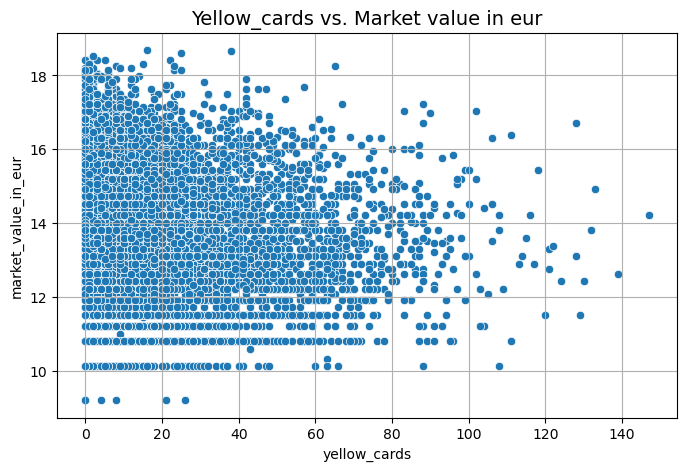

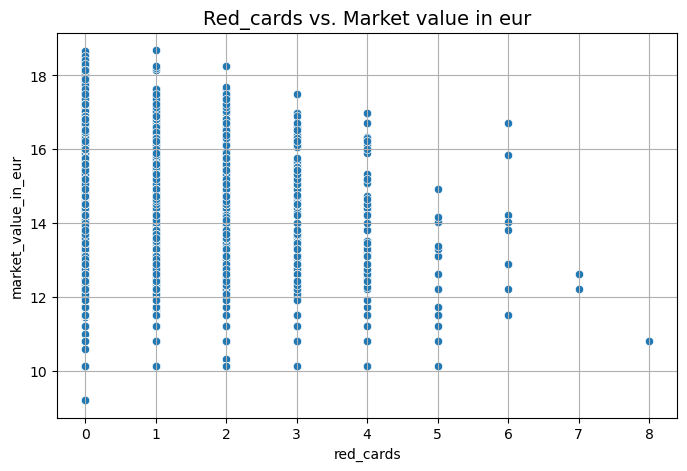

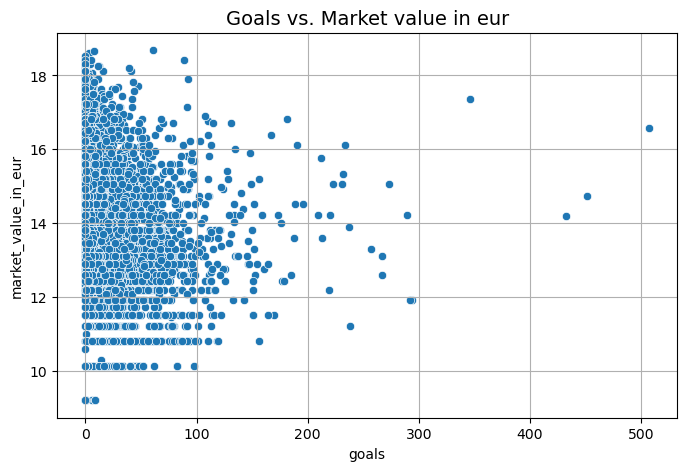

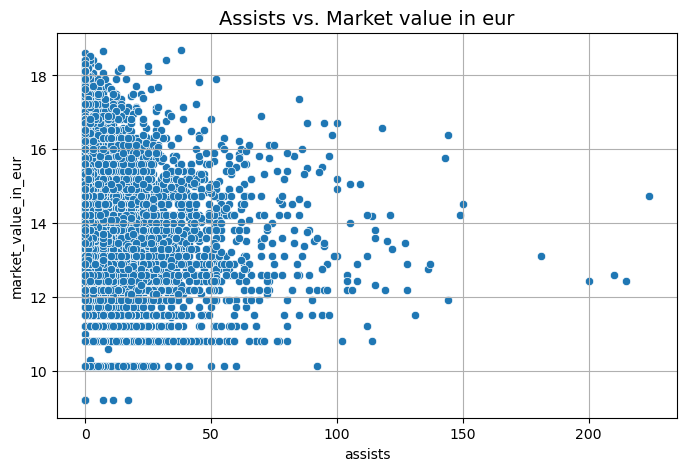

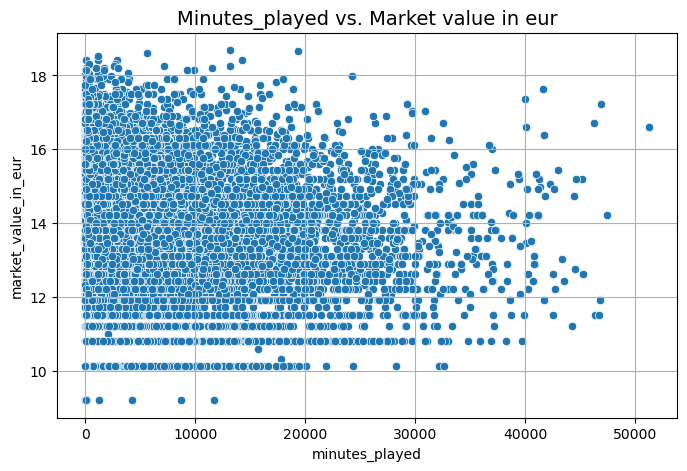

In [84]:
# Loop through each feature to create a scatter plot against the target
for feature in num_cols:
    plt.figure(figsize=(8, 5)) # Optional: adjusts the size of each plot
    sns.scatterplot(x=feature, y=np.log(goals_df['market_value_in_eur']), data=goals_df)
    plt.title(f'{feature.capitalize()} vs. {target.replace("_", " ").capitalize()}', fontsize=14)
    plt.grid(True)
    plt.show()

In [85]:
X = goals_df[num_cols]
log_y = np.log(goals_df[target])

# Split data into 80% for training and 20% for testing
X_train, X_test, y_log_train, y_log_test = train_test_split(X, log_y, test_size=0.2, random_state=42)

In [86]:
log_model = LinearRegression()

log_model.fit(X_train, y_log_train)

LinearRegression()

In [87]:
# Make predictions on the test set
y_log_pred = log_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_log_test, y_log_pred)
r2 = r2_score(y_log_test, y_log_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"RMSE (direct method): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.40
RMSE (direct method): 1.55
R-squared: -0.00


In [98]:
df_encoded = pd.get_dummies(goals_df, columns=['current_club_id','player_club_domestic_competition_id'], drop_first=True)

In [99]:
X = df_encoded.drop(columns = ['player_name', 'market_value_in_eur'])
y = df_encoded[target]

In [100]:
X.shape, y.shape

((19943, 454), (19943,))

In [102]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Use a more powerful model ---
# n_estimators is the number of trees in the forest
# random_state ensures the results are reproducible
rfmodel = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1, verbose=1)

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions
y_pred = rfmodel.predict(X_test)

# Evaluate the new model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Random Forest R-squared: {r2:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")

Random Forest R-squared: -0.07
Random Forest RMSE: 6236186.65


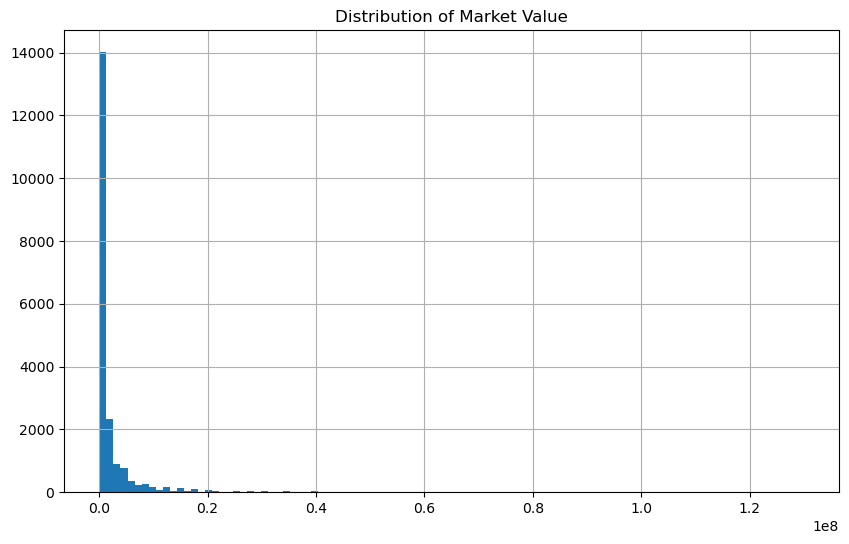

In [104]:
y.hist(bins=100, figsize=(10,6))
plt.title('Distribution of Market Value')
plt.show()

In [150]:
final_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,yellow_cards,red_cards,goals,assists,minutes_played,cumulative_yellow_cards,cumulative_red_cards,cumulative_goals,cumulative_assists,cumulative_minutes_played,date_of_birth,age
0,418560,2024-10-01,200000000,281,GB1,0.0,0.0,1.0,0.0,60.0,17.0,0.0,193.0,38.0,16079.0,2000-07-21,24.20
1,342229,2018-10-24,180000000,418,ES1,0.0,0.0,0.0,0.0,90.0,9.0,1.0,50.0,27.0,5921.0,1998-12-20,19.84
2,342229,2022-11-02,160000000,418,ES1,0.0,0.0,1.0,1.0,90.0,34.0,1.0,186.0,89.0,19040.0,1998-12-20,23.87
3,148455,2019-12-10,150000000,31,GB1,0.0,0.0,1.0,0.0,90.0,12.0,0.0,131.0,63.0,20180.0,1992-06-15,27.49
4,200512,2019-12-10,150000000,27,L1,1.0,0.0,0.0,1.0,90.0,26.0,2.0,94.0,40.0,17038.0,1992-04-10,27.67


In [146]:
cols = ['cumulative_yellow_cards','cumulative_red_cards', 'cumulative_goals', 'cumulative_assists','cumulative_minutes_played', 'age']
target = 'market_value_in_eur'

In [147]:
X = final_df[cols]
y = final_df[target]

# Split data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [149]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"RMSE (direct method): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 164448650517676.97
RMSE (direct method): 12823753.37
R-squared: 0.26


In [171]:
df_encoded = pd.get_dummies(final_df, columns=['current_club_id','player_club_domestic_competition_id','sub_position'], drop_first=True)

In [172]:
df_encoded.head()

,player_id,date,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played,cumulative_yellow_cards,cumulative_red_cards,cumulative_goals,cumulative_assists,cumulative_minutes_played,date_of_birth,age,current_club_id_4,current_club_id_5,current_club_id_10,current_club_id_11,current_club_id_12,current_club_id_13,current_club_id_15,current_club_id_16,current_club_id_18,current_club_id_19,current_club_id_20,current_club_id_24,current_club_id_27,current_club_id_29,current_club_id_31,current_club_id_33,current_club_id_35,current_club_id_36,current_club_id_38,current_club_id_39,current_club_id_41,current_club_id_42,current_club_id_43,current_club_id_44,current_club_id_46,current_club_id_47,current_club_id_58,current_club_id_60,current_club_id_65,current_club_id_79,current_club_id_80,current_club_id_82,current_club_id_86,current_club_id_89,current_club_id_105,current_club_id_114,current_club_id_121,current_club_id_124,current_club_id_126,current_club_id_127,current_club_id_128,current_club_id_130,current_club_id_131,current_club_id_132,current_club_id_133,current_club_id_141,current_club_id_142,current_club_id_148,current_club_id_150,current_club_id_152,current_club_id_157,current_club_id_162,current_club_id_167,current_club_id_169,current_club_id_172,current_club_id_173,current_club_id_180,current_club_id_190,current_club_id_192,current_club_id_200,current_club_id_202,current_club_id_206,current_club_id_232,current_club_id_234,current_club_id_235,current_club_id_237,current_club_id_244,current_club_id_252,current_club_id_265,current_club_id_273,current_club_id_276,current_club_id_281,current_club_id_289,current_club_id_290,current_club_id_294,current_club_id_306,current_club_id_317,current_club_id_331,current_club_id_336,current_club_id_338,current_club_id_339,current_club_id_347,current_club_id_354,current_club_id_366,current_club_id_367,current_club_id_368,current_club_id_369,current_club_id_370,current_club_id_371,current_club_id_379,current_club_id_380,current_club_id_383,current_club_id_385,current_club_id_398,current_club_id_399,current_club_id_403,current_club_id_405,current_club_id_410,current_club_id_415,current_club_id_416,current_club_id_417,current_club_id_418,current_club_id_430,current_club_id_441,current_club_id_443,current_club_id_449,current_club_id_465,current_club_id_467,current_club_id_468,current_club_id_472,current_club_id_475,current_club_id_498,current_club_id_499,current_club_id_506,current_club_id_511,current_club_id_512,current_club_id_520,current_club_id_524,current_club_id_533,current_club_id_543,current_club_id_553,current_club_id_583,current_club_id_589,current_club_id_601,current_club_id_603,current_club_id_605,current_club_id_607,current_club_id_610,current_club_id_618,current_club_id_621,current_club_id_631,current_club_id_641,current_club_id_653,current_club_id_660,current_club_id_667,current_club_id_677,current_club_id_678,current_club_id_681,current_club_id_683,current_club_id_703,current_club_id_714,current_club_id_720,current_club_id_723,current_club_id_724,current_club_id_738,current_club_id_749,current_club_id_750,current_club_id_762,current_club_id_798,current_club_id_800,current_club_id_820,current_club_id_825,current_club_id_826,current_club_id_833,current_club_id_855,current_club_id_865,current_club_id_868,current_club_id_873,current_club_id_903,current_club_id_924,current_club_id_931,current_club_id_932,current_club_id_940,current_club_id_964,current_club_id_968,current_club_id_969,current_club_id_979,current_club_id_982,current_club_id_984,current_club_id_985,current_club_id_987,current_club_id_989,current_club_id_995,current_club_id_1003,current_club_id_1005,current_club_id_1010,current_club_id_1025,current_club_id_1031,current_club_id_1038,current_club_id_1041,current_club_id_1047,current_club_id_1049,current_club_id_1050,current_club_id_1053,current_club_id_1063,current_club_id_1075,current_club_id_1082,current_club_id_1083,current_club_id_1084,current_club_id_1085,curren

In [154]:
df_encoded.columns

Index(['player_id', 'date', 'market_value_in_eur', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'cumulative_yellow_cards',
       'cumulative_red_cards',
       ...
       'player_club_domestic_competition_id_GB1',
       'player_club_domestic_competition_id_GR1',
       'player_club_domestic_competition_id_IT1',
       'player_club_domestic_competition_id_L1',
       'player_club_domestic_competition_id_NL1',
       'player_club_domestic_competition_id_PO1',
       'player_club_domestic_competition_id_RU1',
       'player_club_domestic_competition_id_SC1',
       'player_club_domestic_competition_id_TR1',
       'player_club_domestic_competition_id_UKR1'],
      dtype='object', length=401)

In [173]:
X = df_encoded.drop(columns = ['player_id', 'date', 'market_value_in_eur', 'yellow_cards', 'red_cards',
                                      'goals', 'assists', 'minutes_played', 'date_of_birth'])
y = df_encoded[target]

In [174]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Use a more powerful model ---
# n_estimators is the number of trees in the forest
# random_state ensures the results are reproducible
rfmodel = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1, verbose=1)

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions
y_pred = rfmodel.predict(X_test)

# Evaluate the new model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Random Forest R-squared: {r2:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    4.2s


Random Forest R-squared: 0.68
Random Forest RMSE: 8400567.06


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [185]:
# Define the parameter grid to sample from
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0] # 1.0 is equivalent to 'auto'
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
# n_iter sets how many combinations to try, cv is the number of cross-validation folds
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Try 50 different combinations
    cv=5,       # Use 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

# Fit the random search model (this will take time)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by Randomized Search:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by Randomized Search:
{'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 20}


In [189]:
# Define a more focused parameter grid based on results from random search
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [15, 20, 25],
    'min_samples_leaf': [1, 2],
    'max_features': [1.0, 'sqrt']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search model (this can be very slow)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found by Grid Search:
{'max_depth': 25, 'max_features': 1.0, 'min_samples_leaf': 1, 'n_estimators': 600}


In [190]:
# Use the best estimator to predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the final model
r2 = r2_score(y_test, y_pred)
print(f"\nFinal Model R-squared: {r2:.2f}")


Final Model R-squared: 0.68


In [191]:
# Assuming grid_search is your fitted GridSearchCV object
best_model = grid_search.best_estimator_

# Get and display feature importances
importances = pd.Series(best_model.feature_importances_, index=X.columns)
print(importances.nlargest(15))

cumulative_assists                         0.179923
age                                        0.159409
cumulative_goals                           0.139654
player_club_domestic_competition_id_GB1    0.138332
cumulative_minutes_played                  0.072958
cumulative_yellow_cards                    0.037033
current_club_id_27                         0.034276
current_club_id_418                        0.029980
current_club_id_583                        0.020033
current_club_id_281                        0.014009
cumulative_red_cards                       0.010919
player_club_domestic_competition_id_IT1    0.010577
current_club_id_631                        0.010004
player_club_domestic_competition_id_ES1    0.009463
sub_position_Centre-Forward                0.008072
dtype: float64


In [195]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    n_jobs=-1,
    random_state=42
)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print(f"XGBoost R-squared: {r2:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost R-squared: 0.70
XGBoost RMSE: 8123739.41


In [197]:
# Define the parameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search_xgb.fit(X_train, y_train)

# Print the best parameters found
print("Best XGBoost parameters:", random_search_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.6s
[CV] END co

Exception ignored in: <function ResourceTracker.__del__ at 0x110811bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimato

Exception ignored in: <function ResourceTracker.__del__ at 0x107265bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estim

Exception ignored in: <function ResourceTracker.__del__ at 0x107105bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estima

Exception ignored in: <function ResourceTracker.__del__ at 0x1030cdbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimat

Exception ignored in: <function ResourceTracker.__del__ at 0x1050e5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_esti

Exception ignored in: <function ResourceTracker.__del__ at 0x105255bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estim

Exception ignored in: <function ResourceTracker.__del__ at 0x1036edbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimat

Exception ignored in: <function ResourceTracker.__del__ at 0x103055bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimat

Exception ignored in: <function ResourceTracker.__del__ at 0x103e2dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Best XGBoost parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [199]:
# 1. Initialize the final model with the best parameters
final_xgb_model = XGBRegressor(
    subsample=0.7,
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.05,
    colsample_bytree=0.7,
    n_jobs=-1,
    random_state=42
)

# 2. Train the final model on the entire training dataset
final_xgb_model.fit(X_train, y_train)

# 3. Evaluate the final model on the unseen test set
y_pred_final = final_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
rmse = np.sqrt(mse)

print(f"XGBoost R-squared: {r2:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost R-squared: 0.70
XGBoost RMSE: 8205512.82
